<a href="https://colab.research.google.com/github/GUNAPILLCO/neural_profit/blob/main/2_obtencion_preparacion_exploracion_datos/2_5_1_factores_derivados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4.3. Factores derivados 1:

La dirección del momentum es más confiable cuando está respaldada por presión compradora o vendedora activa

#### Formulación

“Los movimientos recientes del precio tienen mayor probabilidad de revertirse cuando fueron acompañados por una concentración desbalanceada de órdenes de compra o venta agresivas.”

---

### Justificación

- El volumen total no distingue intenciones: puede haber muchas órdenes neutrales o pasivas.
- Pero cuando el momentum reciente fue acompañado por un exceso de volumen de compra o de venta, eso sugiere:
  - Exceso de entusiasmo (buy side) → probable reversión bajista.
  - Exceso de pánico (sell side) → probable reversión alcista.
- Esta hipótesis incorpora presión direccional del flujo de órdenes, lo cual es información más rica que el volumen bruto.

---

### Factores derivados

- **Buy Momentum Reversión**: momentum × proporción de volumen comprador, normalizado por jornada e invertido.
- **Sell Momentum Reversión**: momentum × proporción de volumen vendedor, normalizado por jornada e invertido.

## 0. Clonamos el repositorio

LINK DE REPOSITORIO: https://github.com/GUNAPILLCO/neural_profit

In [2]:
#Clonamos el repo
!git clone https://github.com/GUNAPILLCO/neural_profit.git

Cloning into 'neural_profit'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 120 (delta 14), reused 13 (delta 6), pack-reused 89 (from 1)
Receiving objects: 100% (120/120), 108.21 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Updating files: 100% (36/36), done.


## 1. Importación de Librerías

In [3]:
import sys
#!{sys.executable} -m pip install -q pandas_market_calendars
#print("Librería instalada: pandas_market_calendars")

In [4]:
# Utilidades generales
from datetime import datetime, timedelta
import os
import glob
import requests
import warnings
warnings.filterwarnings('ignore')

# Manejo y procesamiento de datos
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
# Calendario de mercados
#import pandas_market_calendars as mcal

## 2. Carga del dataset mnq_intraday_data

In [10]:
def load_df():
    """
    Función para cargar un archivo Parquet desde el repositorio clonado
    """
    # Definir la URL del archivo Parquet en GitHub
    df_path = '/content/neural_profit/2_obtencion_preparacion_exploracion_datos/mnq_intraday_data.parquet'

    # Leer el archivo Parquet y cargarlo en un DataFrame
    df = pd.read_parquet(df_path)

    # Asegurar que el índice esté en formato datetime
    df.index = pd.to_datetime(df.index)

    # Crear una nueva columna 'date' con la fecha extraída del índice
    df['date'] = df.index.date

    # Reordenar columnas: 'date', 'time_str', y luego el resto
    cols = ['date'] + [col for col in df.columns if col not in ['date']]

    df = df[cols]

    return df

In [14]:
mnq_intraday = load_df()

In [15]:
# 1. Calcular la dirección del cambio de precio
mnq_intraday['price_diff'] = mnq_intraday['close'].diff()
mnq_intraday['direction'] = np.sign(mnq_intraday['price_diff']).replace(0, method='ffill')

# 2. Estimar volumen de compra y venta
mnq_intraday['buy_volume'] = mnq_intraday['volume'] * (mnq_intraday['direction'] > 0)
mnq_intraday['sell_volume'] = mnq_intraday['volume'] * (mnq_intraday['direction'] < 0)


In [16]:
mnq_intraday

,date,open,high,low,close,volume,price_diff,direction,buy_volume,sell_volume
datetime,,,,,,,,,,
2019-12-23 08:00:00-05:00,2019-12-23,8734.00,8734.25,8733.75,8733.75,31,NaN,NaN,0,0
2019-12-23 08:01:00-05:00,2019-12-23,8734.00,8734.25,8733.75,8734.00,16,0.25,1.0,16,0
2019-12-23 08:02:00-05:00,2019-12-23,8734.00,8734.00,8733.25,8733.25,23,-0.75,-1.0,0,23
2019-12-23 08:03:00-05:00,2019-12-23,8734.25,8734.50,8734.00,8734.00,23,0.75,1.0,23,0
2019-12-23 08:04:00-05:00,2019-12-23,8734.00,8734.00,8733.50,8733.75,12,-0.25,-1.0,0,12
...,...,...,...,...,...,...,...,...,...,...
2025-06-13 15:56:00-04:00,2025-06-13,21624.50,21635.00,21613.50,21617.50,3251,-7.00,-1.0,0,3251
2025-06-13 15:57:00-04:00,2025-06-13,21616.50,21635.25,21615.75,21623.75,2201,6.25,1.0,2201,0
2025-06-13 15:58:00-04:00,2025-06-13,21623.25,21632.75,21616.50,21621.75,1859,-2.00,-1.0,0,1859


In [17]:
mnq_intraday['momentum_30'] = mnq_intraday.groupby('date')['close'].transform(
    lambda x: np.log(x) - np.log(x.shift(30)))

# Evitar división por cero (reemplazar 0 por NaN)
mnq_intraday['buy_volume_ratio'] = mnq_intraday['buy_volume'] / mnq_intraday['volume'].replace(0, np.nan)

mnq_intraday['alpha_raw'] = mnq_intraday['momentum_30'] * mnq_intraday['buy_volume_ratio']

mnq_intraday['alpha_factor_buy_momentum_rev'] = mnq_intraday.groupby('date')['alpha_raw'].transform(
    lambda x: -(x - x.mean()) / x.std()
)

mnq_intraday['target_return_30'] = mnq_intraday.groupby('date')['close'].transform(
    lambda x: np.log(x.shift(-30)) - np.log(x)
)

ic_buy_mom = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['alpha_factor_buy_momentum_rev'].corr(x['target_return_30'])
)

print(f"Mean IC (Buy Momentum Reversión - 30 min): {ic_buy_mom.mean():.4f}")

Mean IC (Buy Momentum Reversión - 30 min): 0.0653


In [18]:
# Evitar división por cero (reemplazar 0 por NaN)
mnq_intraday['sell_volume_ratio'] = mnq_intraday['sell_volume'] / mnq_intraday['volume'].replace(0, np.nan)

mnq_intraday['alpha_raw_sell'] = mnq_intraday['momentum_30'] * mnq_intraday['sell_volume_ratio']

mnq_intraday['alpha_factor_sell_momentum_rev'] = mnq_intraday.groupby('date')['alpha_raw_sell'].transform(
    lambda x: -(x - x.mean()) / x.std()
)

ic_sell_mom = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['alpha_factor_sell_momentum_rev'].corr(x['target_return_30'])
)

print(f"Mean IC (Sell Momentum Reversión - 30 min): {ic_sell_mom.mean():.4f}")

Mean IC (Sell Momentum Reversión - 30 min): 0.0726


## 3. Hipótesis 3: Volumen como confirmación de dirección

**"Un movimiento alcista con aumento de volumen tiene más chances de continuar."**
<br><br>
**Justificación técnica:**<br>
Esta hipótesis está basada en un principio clásico del análisis técnico: el volumen confirma la tendencia. Si hay momentum y ese movimiento está respaldado por un volumen inusualmente alto, la probabilidad de que continúe el movimiento es mayor.
<br><br>
**Alpha Factor sugerido:**

$$
\text{Factor}_t = \text{Momentum}_t \times \left( \frac{\text{volume}_t}{\text{VolumenPromedio}_N} \right)
$$

Donde:  
- $\text{Momentum}_t$ es el retorno logarítmico del precio en los últimos $N$ minutos.  
- $\text{VolumenPromedio}_N$ es la media móvil del volumen en una ventana de $N$ minutos.

Usamos N = 5, 15 y 30 como en las hipotesis anteriores.



## 4. Construcción de alpha factor

Evalúa si el momentum acompañado de volumen alto tiene más capacidad predictiva sobre los retornos futuros que el momentum solo.

La normalización z-score por día vuelve el factor comparable entre jornadas.



In [9]:
import numpy as np
import pandas as pd

# 1. Calcular el momentum para 5, 15 y 30 minutos (retorno logarítmico pasado)
mnq_intraday['momentum_5'] = mnq_intraday.groupby('date')['close'].transform(lambda x: np.log(x) - np.log(x.shift(5)))
mnq_intraday['momentum_15'] = mnq_intraday.groupby('date')['close'].transform(lambda x: np.log(x) - np.log(x.shift(15)))
mnq_intraday['momentum_30'] = mnq_intraday.groupby('date')['close'].transform(lambda x: np.log(x) - np.log(x.shift(30)))

# 2. Calcular los retornos futuros como variable objetivo
mnq_intraday['target_return_5'] = mnq_intraday.groupby('date')['close'].transform(lambda x: np.log(x.shift(-5)) - np.log(x))
mnq_intraday['target_return_15'] = mnq_intraday.groupby('date')['close'].transform(lambda x: np.log(x.shift(-15)) - np.log(x))
mnq_intraday['target_return_30'] = mnq_intraday.groupby('date')['close'].transform(lambda x: np.log(x.shift(-30)) - np.log(x))

# 3. Construir el alpha factor: momentum * (volume / volumen promedio minuto)
for N in [5, 15, 30]:
    momentum_col = f'momentum_{N}'
    factor_col = f'mom_vol_{N}'
    z_col = f'mom_vol_z_{N}'

    # Alpha factor usando volumen ajustado por minuto del día
    mnq_intraday[factor_col] = mnq_intraday[momentum_col] * mnq_intraday['volume_ratio_minute']

    # Normalizar el alpha factor por jornada
    mnq_intraday[z_col] = mnq_intraday.groupby('date')[factor_col].transform(
        lambda x: (x - x.mean()) / x.std()
    )

# 4. Evaluar el poder predictivo (Information Coefficient por día)
ic_mv_5 = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['mom_vol_z_5'].corr(x['target_return_5'])
)
ic_mv_15 = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['mom_vol_z_15'].corr(x['target_return_15'])
)
ic_mv_30 = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['mom_vol_z_30'].corr(x['target_return_30'])
)

# 5. Mostrar resultados promedio
print(f"Mean IC (Momentum x Volume - 5 min):  {ic_mv_5.mean():.4f}")
print(f"Mean IC (Momentum x Volume - 15 min): {ic_mv_15.mean():.4f}")
print(f"Mean IC (Momentum x Volume - 30 min): {ic_mv_30.mean():.4f}")

Mean IC (Momentum x Volume - 5 min):  -0.0313
Mean IC (Momentum x Volume - 15 min): -0.0599
Mean IC (Momentum x Volume - 30 min): -0.0981


1. Signo negativo:
    
    El hecho de que los IC sean negativos indica que el alpha factor está correlacionado inversamente con los retornos futuros. Es decir:

    - Cuando el precio sube con alto volumen, tiende a revertir en lugar de continuar.

    Esto contradice la hipótesis original que asume confirmación de dirección.

2. Magnitud creciente con la ventana:
    
    El efecto se vuelve más fuerte (más negativo) a medida que aumenta el horizonte de predicción. Esto sugiere que:
    
    - En el corto plazo (5 min) la señal es más débil (quizás ruido).
    - En horizontes mayores (15-30 min), el mercado tiende a corregir movimientos bruscos con alto volumen.

### Conclusión

1. La hipotesis original no se valida

  - La hipótesis 3 no se valida: Estos valores de IC negativos indican que el factor `momentum × volumen relativo` tiende a anticipar movimientos contrarios al retorno futuro esperado, es decir, hay señales de reversión y no de continuación.

  Esto contradice la hipótesis original, que suponía que un movimiento fuerte con volumen debería continuar en la misma dirección.



Agregar filtros de volumen extremo (e.g., percentil 80+):
Solo considerar el factor cuando el volumen es significativamente alto.

Graficar el IC por minuto intradía para ver si hay patrones según la hora.

### 4.1. Replanteo de hipotesis


Hipótesis alternativa: **Cuando hay un gran movimiento de precio con alto volumen, la dirección tiende a revertirse.**

Esto convierte el alpha factor en un indicador de reversión en lugar de continuación.

In [ ]:
# Invertir el signo del alpha factor (reversión del movimiento con volumen)
for N in [5, 15, 30]:
    mnq_intraday[f'mom_vol_z_rev_{N}'] = -mnq_intraday[f'mom_vol_z_{N}']

# Evaluar el IC del factor invertido (reversión)
ic_mv_rev_5 = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['mom_vol_z_rev_5'].corr(x['target_return_5'])
)
ic_mv_rev_15 = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['mom_vol_z_rev_15'].corr(x['target_return_15'])
)
ic_mv_rev_30 = mnq_intraday.dropna().groupby('date').apply(
    lambda x: x['mom_vol_z_rev_30'].corr(x['target_return_30'])
)

print(f"Mean IC (Momentum x Volume Reversión - 5 min):  {ic_mv_rev_5.mean():.4f}")
print(f"Mean IC (Momentum x Volume Reversión - 15 min): {ic_mv_rev_15.mean():.4f}")
print(f"Mean IC (Momentum x Volume Reversión - 30 min): {ic_mv_rev_30.mean():.4f}")

Mean IC (Momentum x Volume Reversión - 5 min):  0.0275
Mean IC (Momentum x Volume Reversión - 15 min): 0.0518
Mean IC (Momentum x Volume Reversión - 30 min): 0.0860


Al invertir el signo del factor de volumen como confirmación de dirección, el alpha factor pasa de ser negativo a positivo.

Esto valida la hipótesis alternativa: **Cuando hay un gran movimiento de precio con alto volumen, la dirección tiende a revertirse.**

**Conclusión final:**
  - Hipótesis 3 original (Volumen como confirmación de dirección) no se valida.
  - Se valida la hipótesis alternativa: Volumen como confirmación de reversión.

La magnitud crece con la ventana, lo que refuerza que el efecto se manifiesta con más claridad a los 30 minutos.

### 4.2. Comparación con resultados de hipotesis 1 alternativa:  



Resultados Hipotesis 1 reformulada: Si el precio subió mucho en los últimos N minutos, es probable que revierta (baje).

Resultados Hipotesis 3 reformulada: Cuando hay un gran movimiento de precio con alto volumen, la dirección tiende a revertirse.



| Horizonte | Momentum Reversión (H1) | Momentum × Volume Reversión (H3) |
|-----------|--------------------------|-----------------------------------|
| 5 min     | 0.0278                   | 0.0275                            |
| 15 min    | 0.0536                   | 0.0518                            |
| 30 min    | **0.0991**               | **0.0860**                        |

### Comentarios

- Ambos factores funcionan como reversión, es decir, un valor alto del alpha predice un retorno negativo, y viceversa.

- El factor de Hipótesis 1 (momentum reversión) tiene ligeramente mejor desempeño en todos los horizontes, especialmente en 30 minutos.

- La diferencia no es drástica, pero sí consistente: agregar el volumen al momentum no mejora el IC — de hecho, lo reduce ligeramente.

Usaré ambos alpha factor ya que vamos a entrenar un modelo de ML supervisado, y ambos podrían ser útiles como features. Aunque son similares, tienen información ligeramente distinta, y el modelo podría aprender combinaciones no lineales entre ellos.

Lo agregaremos al dataset de entrenamiento, mediremos la importancia de ambos (feature importance), evaluaremos si dicha combinación mejora el R2 o disminuy el error del modelo, y además observamos la correlación entre ambos factores, para ver si aportan información redundante o complementaria.

## 5. Comportamiento del alpha factor por minutos del día




In [ ]:
def plot_ic_by_minute(df: pd.DataFrame,
                      factor_5: str,
                      factor_15: str,
                      factor_30: str,
                      target_prefix: str = 'target_return_',
                      date_col: str = 'date'):
    """
    Calcula y grafica el IC por minuto intradía para tres alpha factors,
    mostrando el eje X en formato horario (desde las 08:30 AM).
    """

    df = df.copy()
    df['minute_index'] = df.groupby(date_col).cumcount()

    def compute_ic_by_minute(factor_col, target_col):
        grouped = df[[factor_col, target_col, 'minute_index']].dropna()
        return grouped.groupby('minute_index').apply(lambda x: x[factor_col].corr(x[target_col]))

    # Calcular ICs por minuto
    ic_minute_5 = compute_ic_by_minute(factor_5, f'{target_prefix}5')
    ic_minute_15 = compute_ic_by_minute(factor_15, f'{target_prefix}15')
    ic_minute_30 = compute_ic_by_minute(factor_30, f'{target_prefix}30')

    # Generar etiquetas horarias cada 30 minutos
    xticks = np.arange(0, 451, 30)
    start_time = pd.to_datetime("08:00")
    time_labels = [(start_time + pd.Timedelta(minutes=i)).strftime("%H:%M") for i in xticks]

    # Graficar
    plt.figure(figsize=(15, 6))
    plt.plot(ic_minute_5.index, ic_minute_5, label='IC - 5 min')
    plt.plot(ic_minute_15.index, ic_minute_15, label='IC - 15 min')
    plt.plot(ic_minute_30.index, ic_minute_30, label='IC - 30 min')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title('IC por Minuto del Día')
    plt.xlabel('Hora intradía (desde 08:00)')
    plt.ylabel('Information Coefficient (IC)')
    plt.xticks(ticks=xticks, labels=time_labels, rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return ic_minute_5, ic_minute_15, ic_minute_30

In [ ]:
def analyze_intraday_ic_extremes(ic_minute_df: pd.DataFrame,
                                 mode: str = 'worst',
                                 top_n: int = 30,
                                 market_open: str = "08:00") -> pd.DataFrame:
    """
    Analiza series de IC minuto a minuto para distintos alpha factors.
    Retorna el IC mínimo, IC máximo, y el promedio de los top_n peores o mejores ICs,
    indicando la hora exacta en la que ocurren los extremos.

    Parámetros:
    - ic_minute_df: DataFrame con columnas = alpha factors, índice = minuto (0 a 450)
    - mode: 'worst' para los peores ICs, 'best' para los mejores ICs
    - top_n: cantidad de valores extremos a promediar
    - market_open: hora de inicio del mercado en formato "HH:MM" (por defecto 08:30)

    Retorna:
    - DataFrame resumen ordenado por el promedio de los ICs extremos
    """
    results = []
    base_time = pd.to_datetime(market_open)

    for col in ic_minute_df.columns:
        series = ic_minute_df[col].dropna()

        if mode == 'worst':
            extreme_vals = series.nsmallest(top_n)
        elif mode == 'best':
            extreme_vals = series.nlargest(top_n)
        else:
            raise ValueError("El parámetro 'mode' debe ser 'worst' o 'best'.")

        extreme_mean = extreme_vals.mean()

        # IC mínimo y su hora
        min_ic = series.min()
        min_minute = series.idxmin()
        min_time = (base_time + pd.Timedelta(minutes=min_minute)).strftime("%H:%M")

        # IC máximo y su hora
        max_ic = series.max()
        max_minute = series.idxmax()
        max_time = (base_time + pd.Timedelta(minutes=max_minute)).strftime("%H:%M")

        results.append({
            'Alpha Factor': col,
            'IC mínimo': min_ic,
            'Hora del IC mínimo': min_time,
            'IC máximo': max_ic,
            'Hora del IC máximo': max_time,
            f'Promedio de los {top_n} {"peores" if mode == "worst" else "mejores"} ICs': extreme_mean
        })

    result_df = pd.DataFrame(results).set_index('Alpha Factor')
    sort_col = result_df.columns[-1]
    result_df = result_df.sort_values(sort_col, ascending=(mode == 'worst'))

    return result_df

### 5.1. Hipotesis original

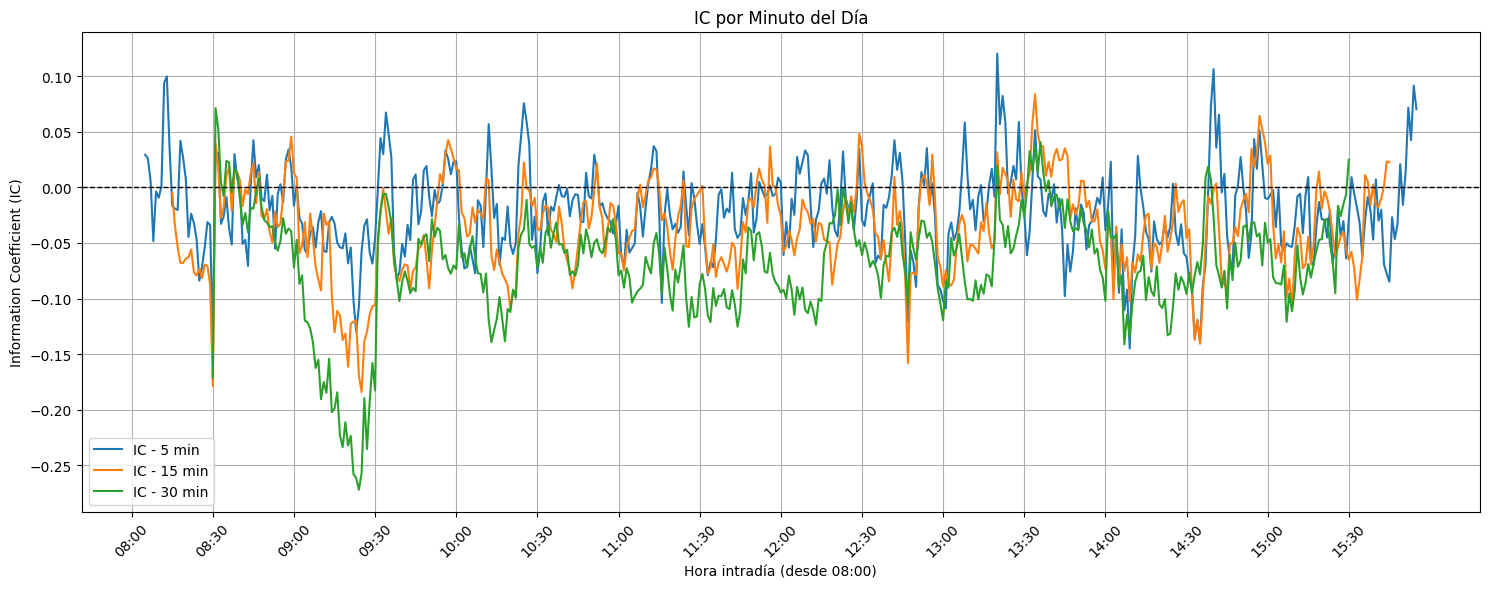

,IC mínimo,Hora del IC mínimo,IC máximo,Hora del IC máximo,Promedio de los 30 peores ICs
Alpha Factor,,,,,
IC_momentum_z_30,-0.271991,09:24,0.071254,08:31,-0.191103
IC_momentum_z_15,-0.184074,09:25,0.083731,13:34,-0.124843
IC_momentum_z_5,-0.144935,14:09,0.120246,13:20,-0.100975


In [ ]:
#Hipotesis 3
ic_minute_5, ic_minute_15, ic_minute_30  = plot_ic_by_minute(
    df=mnq_intraday,
    factor_5='mom_vol_z_5',
    factor_15='mom_vol_z_15',
    factor_30='mom_vol_z_30'
)

# Tenemos ic_minute_5, ic_minute_15, ic_minute_30
ic_minute_df = pd.DataFrame({
    'IC_momentum_vol_5': ic_minute_5,
    'IC_momentum_vol_15': ic_minute_15,
    'IC_momentum_vol_30': ic_minute_30
})

# Ver los peores momentos intradía:
analyze_intraday_ic_extremes(ic_minute_df, mode='worst', top_n=30)

En su versión original, el alpha factor de la Hipótesis 3 (momentum × volumen) mostró fuertes señales de ineficacia, con ICs promedio consistentemente negativos en los 30 peores momentos del día.
Esto sugiere que, en lugar de confirmar tendencias, el factor anticipa reversión, y su desempeño es peor que aleatorio en ciertos tramos horarios, especialmente cerca de la apertura (09:24) y en la tarde (14:09).

### 5.1. Hipotesis reformulada

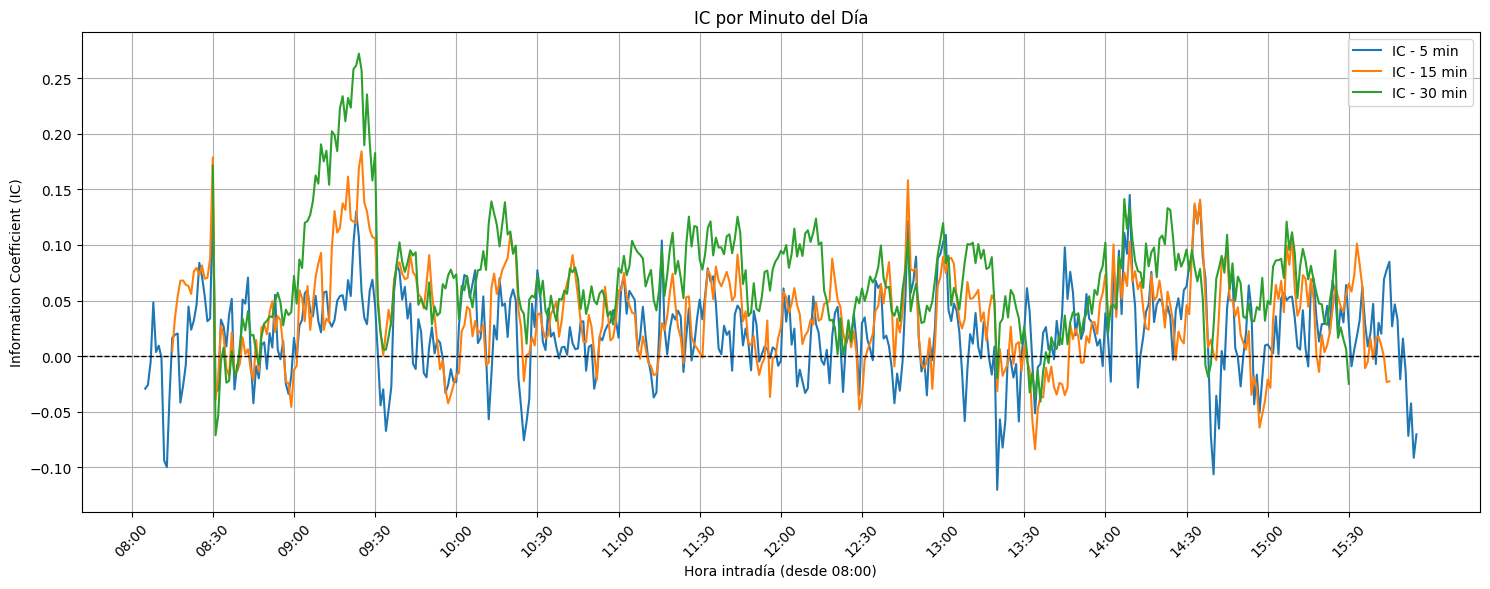

,IC mínimo,Hora del IC mínimo,IC máximo,Hora del IC máximo,Promedio de los 30 peores ICs
Alpha Factor,,,,,
IC_momentum_z_5,-0.120246,13:20,0.144935,14:09,-0.063161
IC_momentum_z_15,-0.083731,13:34,0.184074,09:25,-0.037893
IC_momentum_z_30,-0.071254,08:31,0.271991,09:24,-0.013567


In [ ]:
#Hipotesis 3 reformulada
ic_minute_5, ic_minute_15, ic_minute_30  = plot_ic_by_minute(
    df=mnq_intraday,
    factor_5='mom_vol_z_rev_5',
    factor_15='mom_vol_z_rev_15',
    factor_30='mom_vol_z_rev_30'
)

# Tenemos ic_minute_5, ic_minute_15, ic_minute_30
ic_minute_df = pd.DataFrame({
    'IC_momentum_vol_rev_5': ic_minute_5,
    'IC_momentum_vol_rev_15': ic_minute_15,
    'IC_momentum_vol_rev_30': ic_minute_30
})

# Ver los peores momentos intradía:
analyze_intraday_ic_extremes(ic_minute_df, mode='worst', top_n=30)

La reformulación del alpha factor de Hipótesis 3 (momentum × volumen, con signo invertido) mejoró sustancialmente su desempeño:

- El promedio de los 30 peores ICs es mucho menos negativo que en la versión original.

- El factor de 30 minutos es el más robusto: tiene el IC máximo más alto (0.271) y el peor promedio menos negativo (-0.0135), indicando mejor estabilidad y poder predictivo.

**Me conviene usar el factor con horizonte de 30 minutos. Es el que mejor combina señal positiva y menor ruido intradía.**

##6. Agregar el alpha factor a dataset

In [ ]:
#Copiamos el dataset limpio
mnq_intraday = load_df()

In [ ]:
def add_reversion_vol_momentum_factor(df: pd.DataFrame,
                                      price_col: str = 'close',
                                      volume_col: str = 'volume',
                                      date_col: str = 'date',
                                      window: int = 30) -> pd.DataFrame:
    """
    Agrega una columna 'reversion_vol_momentum_factor' al DataFrame,
    que representa un alpha factor de reversión basado en:
    - Momentum a N minutos
    - Relación volumen actual / volumen promedio N
    - Z-score del factor por jornada
    - Inversión de signo para capturar reversión

    Parámetros:
    - df: DataFrame de entrada con columnas de precios, volumen y fechas
    - price_col: nombre de la columna de precios (default='close')
    - volume_col: nombre de la columna de volumen (default='volume')
    - date_col: nombre de la columna de fecha o jornada (default='date')
    - window: ventana en minutos para calcular momentum y volumen promedio (default=30)

    Retorna:
    - DataFrame con la columna 'reversion_vol_momentum_factor' añadida
    """
    df = df.copy()

    # 1. Calcular el momentum
    df['momentum'] = df.groupby(date_col)[price_col].transform(
        lambda x: np.log(x) - np.log(x.shift(window))
    )

    # 2. Calcular volumen promedio intradía (rolling por jornada)
    df['vol_avg'] = df.groupby(date_col)[volume_col].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )

    # 3. Relación volumen actual / volumen promedio
    df['vol_ratio'] = df[volume_col] / df['vol_avg']

    # 4. Alpha factor crudo: momentum × vol_ratio
    df['mom_vol'] = df['momentum'] * df['vol_ratio']

    # 5. Normalización diaria y reversión
    df['reversion_vol_momentum_factor'] = df.groupby(date_col)['mom_vol'].transform(
        lambda x: -(x - x.mean()) / x.std()
    )

    # 6. Limpieza opcional de columnas intermedias
    df.drop(columns=['momentum', 'vol_avg', 'vol_ratio', 'mom_vol'], inplace=True)

    return df

In [ ]:
mnq_intraday = add_reversion_vol_momentum_factor(mnq_intraday, window=30)


In [ ]:
mnq_intraday.iloc[25:60]


,open,high,low,close,volume,date,reversion_vol_momentum_factor
datetime,,,,,,,
2019-12-23 08:25:00-05:00,8735.50,8736.00,8735.25,8736.00,32,2019-12-23,NaN
2019-12-23 08:26:00-05:00,8736.00,8736.00,8733.75,8735.00,54,2019-12-23,NaN
2019-12-23 08:27:00-05:00,8735.25,8736.00,8735.00,8736.00,26,2019-12-23,NaN
2019-12-23 08:28:00-05:00,8735.75,8736.00,8735.50,8736.00,19,2019-12-23,NaN
2019-12-23 08:29:00-05:00,8736.25,8736.50,8736.00,8736.50,18,2019-12-23,NaN
2019-12-23 08:30:00-05:00,8736.25,8737.50,8736.25,8737.00,30,2019-12-23,-0.581489
2019-12-23 08:31:00-05:00,8737.00,8737.25,8736.00,8736.50,45,2019-12-23,-0.627798
2019-12-23 08:32:00-05:00,8736.50,8736.75,8735.50,8736.00,73,2019-12-23,-0.936576
2019-12-23 08:33:00-05:00,8736.50,8736.75,8736.00,8736.75,51,2019-12-23,-0.691828
